<a href="https://colab.research.google.com/github/cfreeman22/D213/blob/main/D213_task1_b2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __D213 Advanced Data Analytics Task 1 Time Series Analysis__

  

## __1.	Introduction__

  <p>  Time series analysis is a powerful tool for understanding and predicting complex systems that evolve. Whether the targeted tendency is financial data, weather patterns, or social media trends, time series analysis can provide valuable insights into patterns, trends, and seasonality. This project aims to explore the world of time series analysis, diving deep into the data to uncover hidden patterns and relationships in Teleco's daily revenues in the first two years of operation. The aim is to develop accurate forecasts and predictive models to help make informed decisions and drive business success. We will start by defining our research question and selecting appropriate data sources before moving on to data preparation and exploratory analysis. We will use cutting-edge techniques such as ARIMA and seasonal decomposition to uncover hidden patterns and identify key drivers of variation. By the end of this project, we will have gained a deep understanding of time series analysis and its applications.</p>

# __PART I: Research Question__
## __A.1 Summary of the research question__


<p>Through this investigation, the study aims to explore the trends and patterns that may exist within Teleco's daily revenue streams and determine if any notable correlations or relationships exist between revenue and other variables.</P>

__Research question:__ 
__Can we understand the daily patterns of Teleco revenues in the first two years of operation using time series analysis?__

## __A.2        Goals and objectives of the data analysis__

The primary objective of time series analysis is to understand the underlying patterns, trends, and behaviors in the Teleco time series dataset. In the context of the research question, the goal of time series analysis is to identify and analyze the daily patterns of Teleco revenues during the first two years of operation. Through this investigation, the study aims to explore the trends and patterns that may exist within Teleco's daily revenue streams and determine if any notable correlations or relationships exist between revenue and other variables. This analysis can provide valuable insights into how the revenues have evolved, how they are affected by different factors such as seasonality or external events, and what forecasts or predictions are plausible for future revenues. Additionally, the objectives of time series analysis in this scenario include identifying potential anomalies affecting the revenue data, detecting any underlying trends or cyclical patterns, and evaluating the effectiveness of different forecasting methods. By leveraging time series analysis techniques, the study hopes to develop a comprehensive understanding of Teleco's financial performance during this critical period, crucial in informing future business strategies and decision-making processes ().

# __Part II: Method Justification__
## __B.1 Assumption of a time series__
   Time series analysis relies on several assumptions, including:
1.	Stationarity: The time series data should have a constant mean, variance, and autocovariance over time. It means that the statistical properties of the data should stay the same over time.
2.	Autocorrelation: The observations in a time series depend on each other, and the correlation between them should be consistent over time.
3.	No seasonality: A seasonal adjustment is required before conducting a time series analysis if the time series exhibits seasonal patterns.
If the data is not stationary, the results of the time series analysis may be biased or inaccurate ().
<p> For this analysis, the assumption of stationarity is particularly relevant. The assumption of autocorrelation is also essential, as the goal is to understand how the daily revenues of Teleco depend on each other over time.</P>

# __PART III: Data Preparation__ 
##  __C   Data preparation summary__
##  __C.1  Line graph visualizing the realization of the time series__
   The graph belows displays a line graph  visualization of the Time Series Analysis. There is an upward trending line which usually indicates the presence of a trend in the data.

In [1]:

! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.0 MB/s eta 0:00:00


In [2]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from dateutil.parser import parse
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from scipy.signal import periodogram
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading the data from my google drive.
data = pd.read_csv('/content/drive/My Drive/teleco_time_series .csv')

## __Data Preparation steps__

In [5]:
data.head()

,Day,Revenue
0,1,0.000000
1,2,0.000793
2,3,0.825542
3,4,0.320332
4,5,1.082554


In [6]:
#checking for nulls
data.isnull().sum()

Day        0
Revenue    0
dtype: int64

In [7]:
# Setting the Day column as the index for easier processing
# Since there is no starting date mentioned, let us assume the first date of operation was Jan 1st, 2017
data.set_index('Day',inplace=True)
data.index=pd.to_datetime(data.index, unit = 'D', origin = '2017-01-01')

## __C1 Line graph visualization of the time series__

In [ ]:
file_path = '/content/drive/My Drive/teleco_time_series .csv'


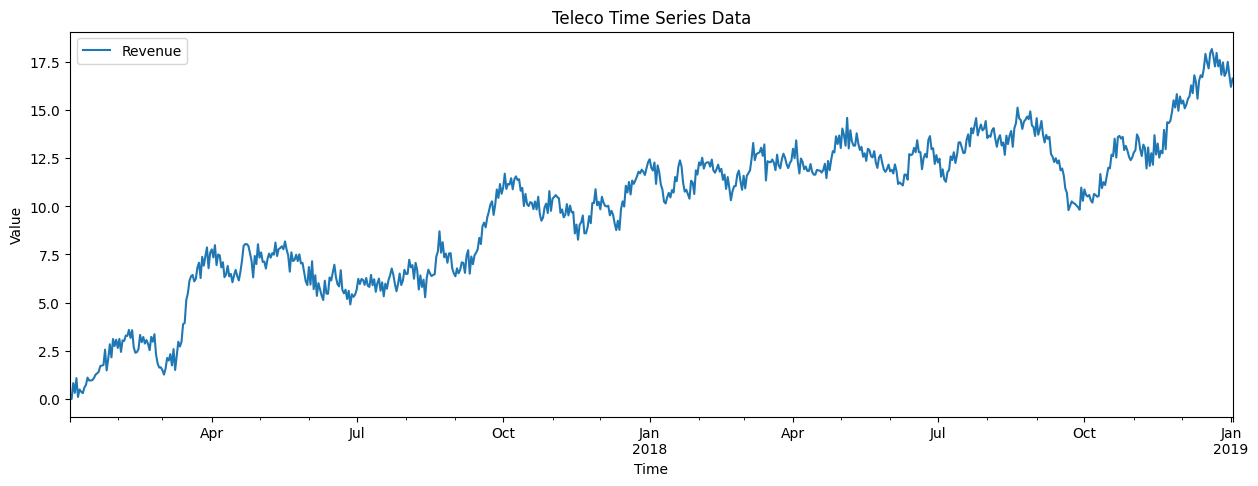

In [8]:
# Plotting the time series
data.plot(figsize=(15, 5))
plt.title("Teleco Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

## __C2 Time step formating__

The frequency is complete, which means there are no gaps in the data, and it is all equally spaced. The data presented no null values, and the length ranged from 0 to 730, with 731 rows and two columns. The first column, "Day," is set as the index to be more easily processed as a time series. The index is converted to a panda's datetime with a starting date of Jan 1st, 2017, assuming that this was the telecommunication company's first operation date. _desribe other steps in the begining_

## __C3 Evaluate the Stationarity of the Time Series__

To evaluate the stationarity of a time series, we can use various statistical tests such as the Augmented Dickey-Fuller (ADF) test or the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test. These tests check if the mean and variance of the time series are constant over time. The output below displays the ADF test statistic, p-value, and critical values at different confidence levels. If the p-value is less than a specified significance level (e.g., 0.05), we can reject the null hypothesis that the time series is non-stationary. Our crucial values for stationarity are -3.4, -2.8, and -2.5, respectively, and our test statistic is -1.9. We can see from this result that our data is not stationary because the test statistic is not below the crucial values.

In [9]:
# Define the ADF test function
def adf_test(timeseries):
    adf_result = adfuller(timeseries, autolag='AIC')
    adf_output = pd.Series(adf_result[0:4], index=['Test Statistic','p-value','# Lags Used','# Observations Used'])
    for key,value in adf_result[4].items():
        adf_output['Critical Value (%s)'%key] = value
    print(adf_output)

# Apply the ADF test to the data
adf_test(data['Revenue'])

Test Statistic           -1.924612
p-value                   0.320573
# Lags Used               1.000000
# Observations Used     729.000000
Critical Value (1%)      -3.439352
Critical Value (5%)      -2.865513
Critical Value (10%)     -2.568886
dtype: float64


## __C.4 Steps used to prepare the data for analysis__
- Adjusting the statonarity of the data
- Checking for nulls, duplicates
- Make a Clean copy
 

In [10]:
#Making time series stationary
data_diff = data.diff().dropna()
data_diff

,Revenue
Day,
2017-01-03,0.000793
2017-01-04,0.824749
2017-01-05,-0.505210
2017-01-06,0.762222
2017-01-07,-0.974900
...,...
2018-12-29,0.170280
2018-12-30,0.559108
2018-12-31,-0.687028


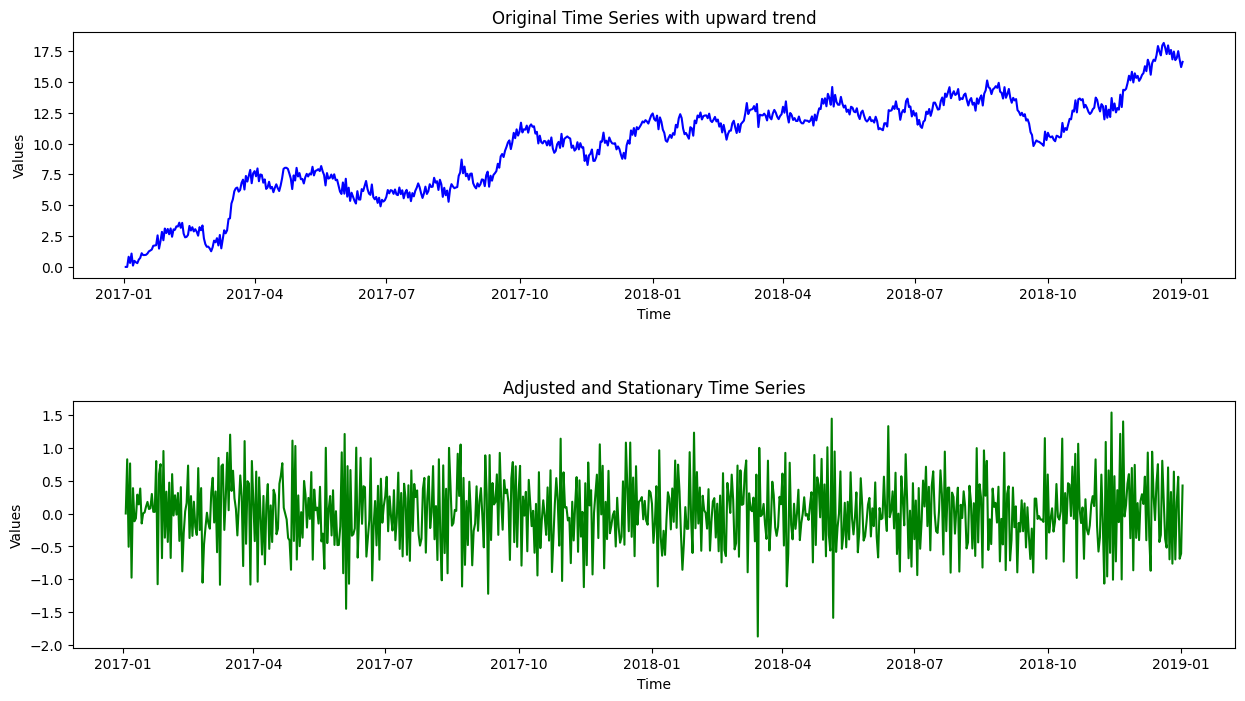

In [11]:
# Create a figure with two subplots 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8)) 
# Add data and labels to the first subplot 
ax1.plot(data["Revenue"], color='blue') 
ax1.set_title('Original Time Series with upward trend') 
ax1.set_xlabel('Time') 
ax1.set_ylabel('Values') 
# Add data and labels to the second subplot 
ax2.plot(data_diff['Revenue'], color='green') 
ax2.set_title('Adjusted and Stationary Time Series') 
ax2.set_xlabel('Time') 
ax2.set_ylabel('Values') 
# Add spacing between subplots and display the figure 
plt.subplots_adjust(hspace=0.5) 
plt.show()

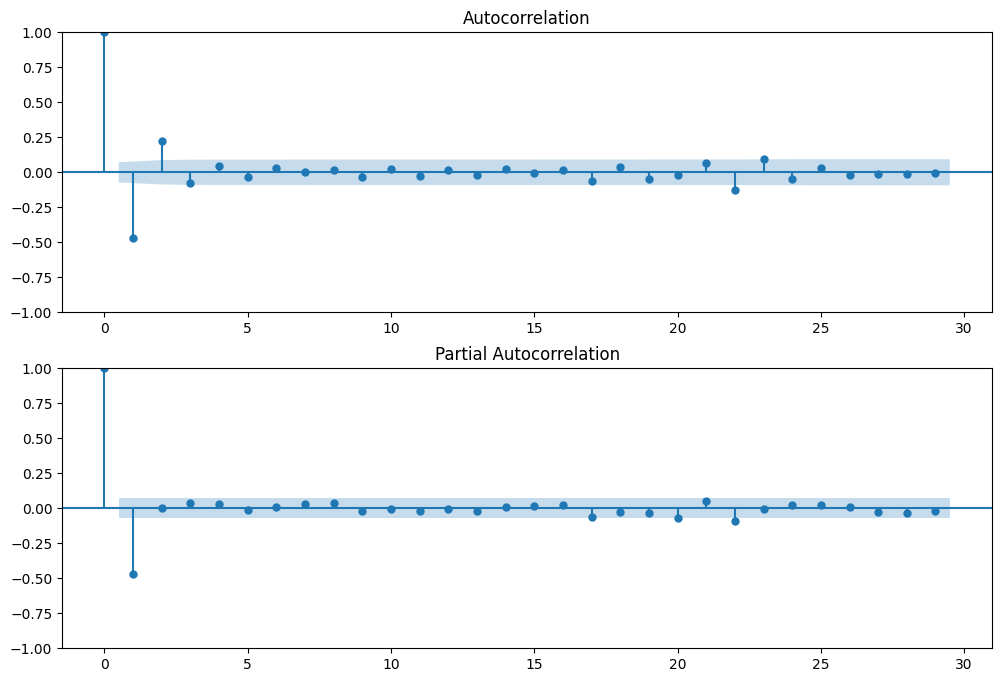

In [12]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_diff['Revenue'], ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_diff['Revenue'], ax=ax2)

In [13]:
#Testing Stationarity of the adjusted data
adf_test(data_diff['Revenue'])

Test Statistic          -44.874527
p-value                   0.000000
# Lags Used               0.000000
# Observations Used     729.000000
Critical Value (1%)      -3.439352
Critical Value (5%)      -2.865513
Critical Value (10%)     -2.568886
dtype: float64


In [14]:
#Checking for nulls
print(data_diff.isna().any())
print('****************')
#Checking for duplicates
print(data_diff.duplicated().any())

Revenue    False
dtype: bool
****************
False


In [15]:
# Saving a copy of cleaned data
#data_diff2.to_csv('cleaned_time_series.csv', index = False)

We not notice above that the statistics have improved.  on this test it is way lower than our crucial values for stationarity are -3.4, -2.8, and -2.5, respectively

## __D2 Model Identification and Analysis__

In [16]:
# Split data into train and test sets
train_size = int(len(data) * 0.66)
train, test = data[:train_size], data[train_size:]


In [17]:

# Use auto_arima with trace on to fit the ARIMA model
arima_model = auto_arima(train['Revenue'], trace=1)

# Print the optimal p, d, and q values
print('Optimal p: {}'.format(arima_model.order[0]))
print('Optimal d: {}'.format(arima_model.order[1]))
print('Optimal q: {}'.format(arima_model.order[2]))

# Fit the ARIMA model to the training data
arima_model.fit(train['Revenue'])

# Make predictions on the test data
predictions = arima_model.predict(n_periods=30)

# Print the predictions
print(predictions)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=646.561, Time=2.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=755.655, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=642.622, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=666.865, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=755.035, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=644.441, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=644.478, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=645.872, Time=2.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=644.213, Time=0.09 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 6.059 seconds
Optimal p: 1
Optimal d: 1
Optimal q: 0
2018-04-29    13.282790
2018-04-30    13.481976
2018-05-01    13.430657
2018-05-02    13.495014
2018-05-03    13.505955
2018-05-04    13.541562
2018-05-05    13.565779
2018-05-06    13.595256
2018-05-07    13.622304
2018-05-08    13.650473
2018-05-09    13

In [18]:
 
# 1,0,0 ARIMA Model
model = ARIMA(train['Revenue'], order=(1,1,0))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                  482
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -320.106
Date:                Thu, 20 Apr 2023   AIC                            644.213
Time:                        15:51:45   BIC                            652.565
Sample:                    01-02-2017   HQIC                           647.495
                         - 04-28-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4579      0.040    -11.420      0.000      -0.536      -0.379
sigma2         0.2215      0.015     14.500      0.000       0.192       0.251
Ljung-Box (L1) (Q):                   0.01   Jarque-

## __D3 Forecasting with derived ARIMA__

In [19]:
# Fit the model and make predictions
size = int(len(data_diff) * 0.66)
train, test = data_diff.iloc[:size], data_diff.iloc[size:]
history = [x for x in train['Revenue']]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test['Revenue'][t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# Calculate root mean squared error
rmse = sqrt(mean_squared_error(test['Revenue'], predictions))
print(f'RMSE: {rmse:.2f}')

 

predicted=0.176884, expected=-0.398402
predicted=0.508735, expected=0.442802
predicted=-0.177480, expected=-0.650088
predicted=0.156878, expected=1.008159
predicted=-0.220132, expected=-0.324824
predicted=0.663120, expected=-0.562324
predicted=-0.387268, expected=1.442980
predicted=-0.037208, expected=-1.585790
predicted=0.672962, expected=0.943729
predicted=-0.947698, expected=-0.583497
predicted=0.555142, expected=-0.212997
predicted=-0.488202, expected=-0.003891
predicted=-0.159125, expected=0.640939
predicted=0.162491, expected=-0.535783
predicted=0.338562, expected=-0.329183
predicted=-0.482313, expected=0.163790
predicted=-0.201442, expected=-0.513667
predicted=-0.011509, expected=0.178902
predicted=-0.334669, expected=-0.394099
predicted=0.030863, expected=0.628061
predicted=-0.130835, expected=-0.071771
predicted=0.447718, expected=-0.317071
predicted=-0.135290, expected=-0.057014
predicted=-0.249744, expected=0.321697
predicted=0.041163, expected=-0.589136
predicted=0.086078, 

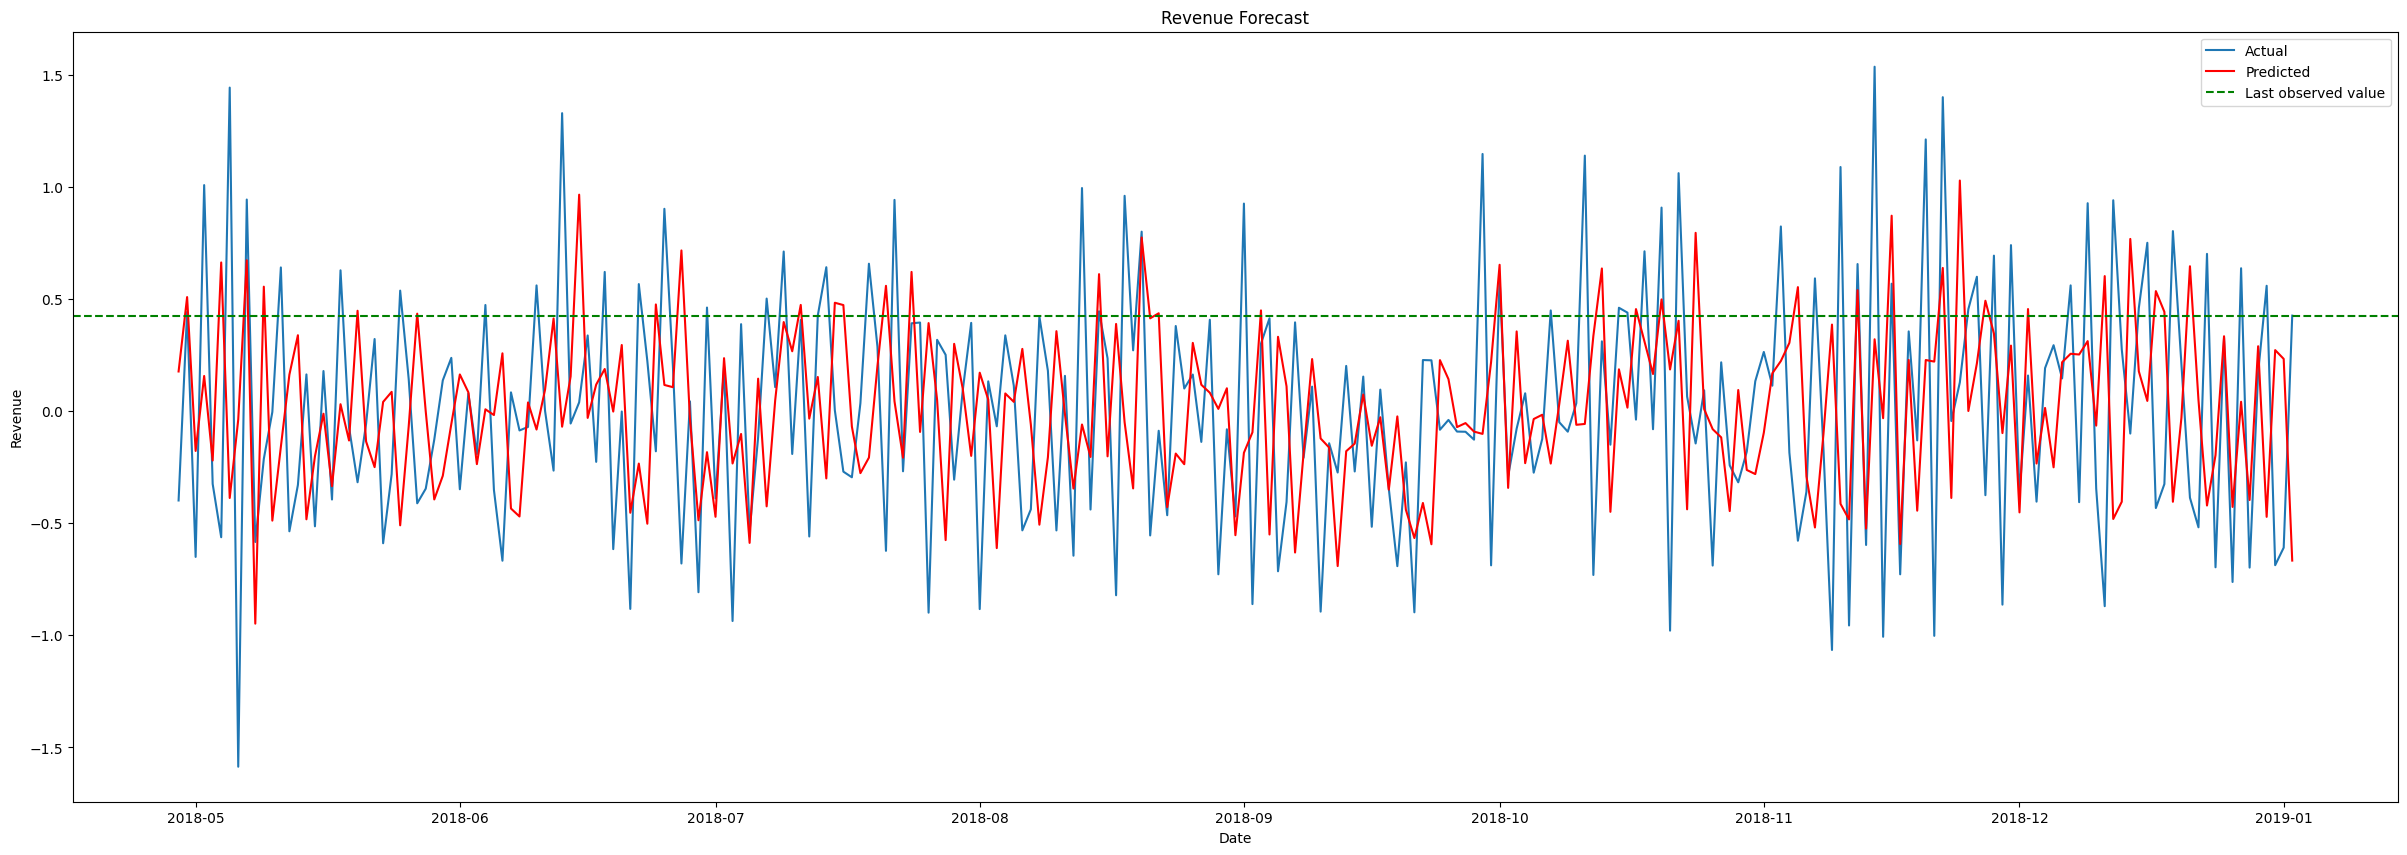

In [20]:
# Plot the results
plt.figure(figsize=(30,10))
plt.plot(test.index, test['Revenue'], label='Actual')
plt.plot(test.index, predictions, label='Predicted',color='red')
plt.axhline(y=test['Revenue'].iloc[-1], color='green', linestyle='--', label='Last observed value')
plt.title('Revenue Forecast')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()

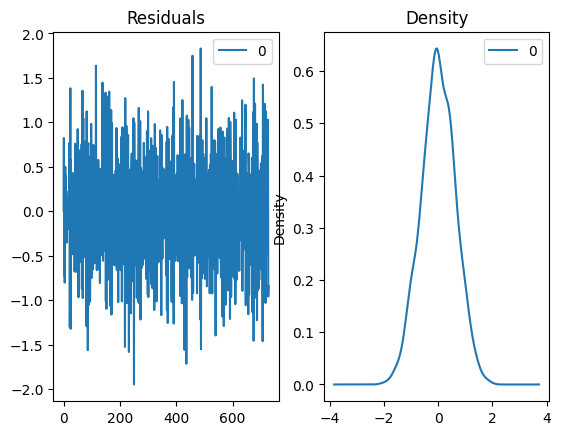

In [21]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

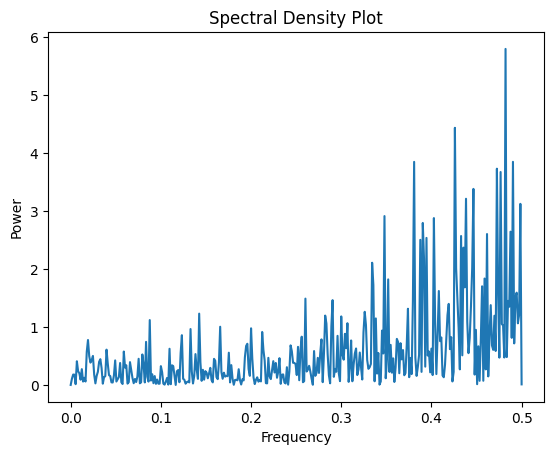

In [22]:
# Compute the spectral density for the time series data
freq, power = periodogram(data_diff['Revenue']) 
 # Create a line plot of the spectral density 
plt.plot(freq, power) 
 # Set the plot title and axis labels 
plt.title('Spectral Density Plot') 
plt.xlabel('Frequency') 
plt.ylabel('Power') 

 # Show the plot 
plt.show()